In [1]:
import pandas as pd

In [2]:
# Load the file to see the contents
data = pd.read_csv('../../data/curated/predictions_Lg.csv')

# Display the first few rows to understand the structure of the data
data.head()

,postcode,Year,Bed,Apartment,population,income,Camp,Language,Primary,Secondary,Special,school_total,tram_count,bus_count,train_count,park_count,mean_park_area,predicted_rent
0,3206,2024,2,0,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,597.860911
1,3206,2024,3,0,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,678.763967
2,3206,2024,4,0,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,759.667024
3,3206,2024,1,1,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,495.298763
4,3206,2024,2,1,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,576.201820


In [3]:
data_0 = data[(data['Apartment'] == 0)]
# Calculate the projected rental growth rate
data_0['predicted_rent_growth'] = data_0.groupby('postcode')['predicted_rent'].pct_change()

# Get the latest forecast growth rate for each postcode
latest_growth_0 = data_0.groupby('postcode')['predicted_rent_growth'].last().reset_index()

# Delete duplicate values for postcodes, keeping only different growth rates
unique_postcodes_top_10_0 = latest_growth_0.drop_duplicates(subset=['predicted_rent_growth'], keep='first')

# Sort and select the top 10 postcodes with the highest growth rates
top_10_unique_postcodes_0 = unique_postcodes_top_10_0.sort_values(by='predicted_rent_growth', ascending=False).head(10)

# Show the top 10 different postcodes and the corresponding growth rates
print(top_10_unique_postcodes_0)

     postcode  predicted_rent_growth
157      3825               0.194730
161      3875               0.181645
144      3550               0.177156
10       3020               0.172543
131      3280               0.172111
146      3564               0.170369
160      3850               0.170160
159      3844               0.169248
125      3216               0.167917
152      3690               0.164218


/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_70423/3436474759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['predicted_rent_growth'] = data_0.groupby('postcode')['predicted_rent'].pct_change()


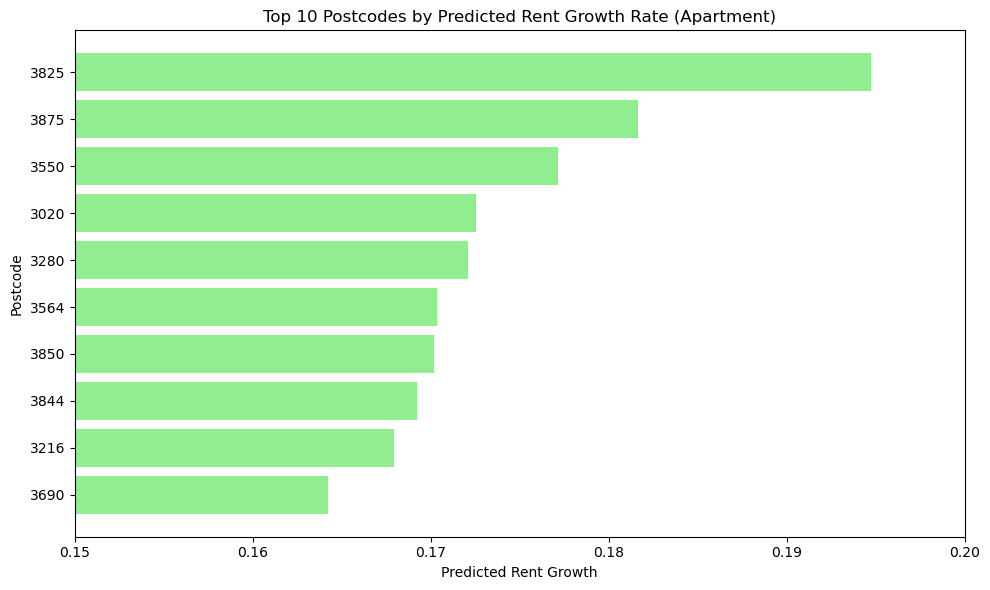

In [4]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the top 10 unique postcodes by predicted rent growth
plt.figure(figsize=(10,6))
plt.barh(top_10_unique_postcodes_0['postcode'].astype(str), top_10_unique_postcodes_0['predicted_rent_growth'], color='lightgreen')
plt.xlabel('Predicted Rent Growth')
plt.ylabel('Postcode')
plt.title('Top 10 Postcodes by Predicted Rent Growth Rate (Apartment)')
plt.xlim(0.15, 0.20)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest growth at the top

# Display the plot
plt.tight_layout()
plt.savefig("../../plots/Top 10 Postcodes by Predicted Rent Growth Rate (Apartment).png")

In [5]:
data_1 = data[(data['Apartment'] == 1)]
# Calculate the projected rental growth rate
data_1['predicted_rent_growth'] = data_1.groupby('postcode')['predicted_rent'].pct_change()

# Get the latest forecast growth rate for each postcode
latest_growth = data_1.groupby('postcode')['predicted_rent_growth'].last().reset_index()

# Delete duplicate values for postcodes, keeping only different growth rates
unique_postcodes_top_10 = latest_growth.drop_duplicates(subset=['predicted_rent_growth'], keep='first')

# Sort and select the top 10 postcodes with the highest growth rates
top_10_unique_postcodes = unique_postcodes_top_10.sort_values(by='predicted_rent_growth', ascending=False).head(10)

# Show the top 10 different postcodes and the corresponding growth rates
print(top_10_unique_postcodes)

     postcode  predicted_rent_growth
157      3825               0.348725
161      3875               0.308878
144      3550               0.296119
10       3020               0.283450
131      3280               0.282289
146      3564               0.277633
160      3850               0.277076
159      3844               0.274668
125      3216               0.271179
152      3690               0.261661


/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_70423/2810821707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['predicted_rent_growth'] = data_1.groupby('postcode')['predicted_rent'].pct_change()


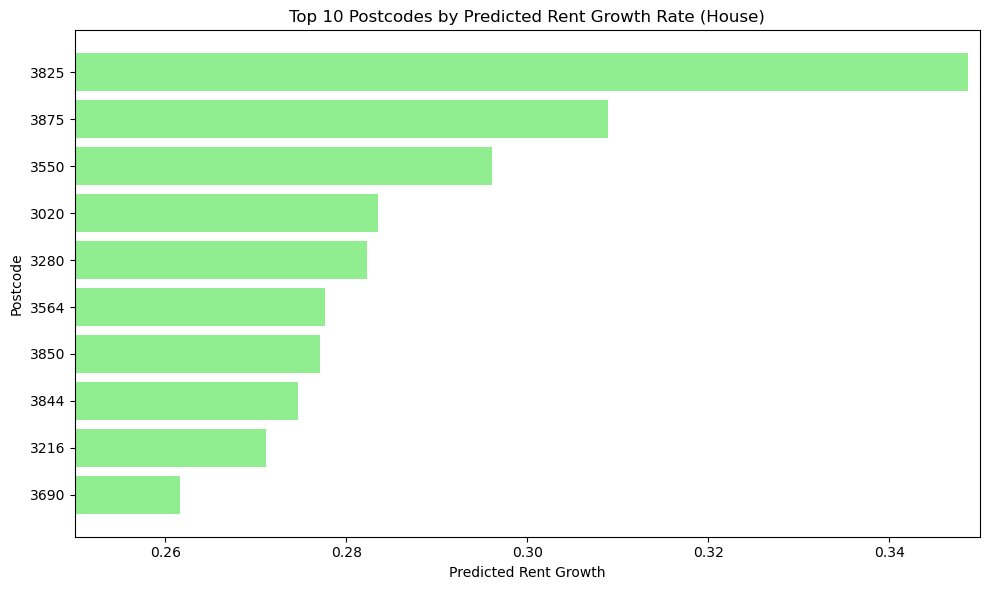

In [6]:
plt.figure(figsize=(10,6))
plt.barh(top_10_unique_postcodes['postcode'].astype(str), top_10_unique_postcodes['predicted_rent_growth'], color='lightgreen')
plt.xlabel('Predicted Rent Growth')
plt.ylabel('Postcode')
plt.title('Top 10 Postcodes by Predicted Rent Growth Rate (House)')
plt.xlim(0.25, 0.35)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest growth at the top

# Display the plot
plt.tight_layout()
plt.savefig("../../plots/Top 10 Postcodes by Predicted Rent Growth Rate (House).png")

In [7]:
filtered_data_3825 = data_1[(data_1['postcode'] == 3825)]

# 获取最高预测租金
max_rent_3825 = filtered_data_3825['predicted_rent']

filtered_data_3825

,postcode,Year,Bed,Apartment,population,income,Camp,Language,Primary,Secondary,Special,school_total,tram_count,bus_count,train_count,park_count,mean_park_area,predicted_rent,predicted_rent_growth
2003,3825,2024,1,1,-0.016737,221270,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,188.675852,NaN
2004,3825,2024,2,1,-0.016737,221270,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,269.578908,0.428794
2008,3825,2025,1,1,0.002185,229226,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,202.993068,-0.246999
2009,3825,2025,2,1,0.002185,229226,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,283.896124,0.398551
2013,3825,2026,1,1,0.002145,237468,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,217.472141,-0.233973
2014,3825,2026,2,1,0.002145,237468,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,298.375197,0.372016
2018,3825,2027,1,1,0.002140,246007,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,231.996699,-0.222467
2019,3825,2027,2,1,0.002140,246007,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,312.899755,0.348725


In [8]:
filtered_data_3825_0 = data_0[(data_0['postcode'] == 3825)]

# 获取最高预测租金
max_rent_3825_0 = filtered_data_3825_0['predicted_rent']

filtered_data_3825_0

,postcode,Year,Bed,Apartment,population,income,Camp,Language,Primary,Secondary,Special,school_total,tram_count,bus_count,train_count,park_count,mean_park_area,predicted_rent,predicted_rent_growth
2000,3825,2024,2,0,-0.016737,221270,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,291.238000,NaN
2001,3825,2024,3,0,-0.016737,221270,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,372.141056,0.277790
2002,3825,2024,4,0,-0.016737,221270,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,453.044113,0.217399
2005,3825,2025,2,0,0.002185,229226,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,305.555216,-0.325551
2006,3825,2025,3,0,0.002185,229226,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,386.458272,0.264774
2007,3825,2025,4,0,0.002185,229226,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,467.361329,0.209345
2010,3825,2026,2,0,0.002145,237468,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,320.034289,-0.315232
2011,3825,2026,3,0,0.002145,237468,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,400.937345,0.252795
2012,3825,2026,4,0,0.002145,237468,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,481.840402,0.201785
2015,3825,2027,2,0,0.002140,246007,0.0,0.0,11.0,1.0,1.0,13.0,0.0,10.0,1.0,52.0,4011.399558,334.558847,-0.305665
